In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

resultPath = "resultFiles/featureExtractionV2_by_Jun/"

intersected_genes = []
for x in ['CD4', 'CD8', 'CD14']:

    df_healthy = pd.read_csv(resultPath+"HealthyPatients/"+x+".Ranksum.RFECV.gene.result", index_col=0)
    df_long = pd.read_csv(resultPath+"LongDiseaseDuration/"+x+".Ranksum.RFECV.gene.result", index_col=0)
    print(x)
    print(len(df_healthy), len(df_long))
    intersected_genes.append(list(set(df_healthy.index.tolist()).intersection(set(df_long.index.tolist()))))
flatten_genes = []
for x in intersected_genes:
    print(len(x))
    for y in x:
        flatten_genes.append(y)

CD4
257 66
CD8
329 78
CD14
53 198
8
7
3


In [40]:
## Utils and Library for notebook
from notebook_utils.OpenKbcMSToolkit import ExtractionToolkit as exttoolkit
import itertools
def _LoadDiseaseDuration(df, meta_data, returntype='long'):
    """
    df : Expression or activation score matrix
    meta_data : meta data which contains duration and sample ID
    output: long DD samples and short DD samples by list, or healthy samples and short DD samples by list
    """
    # Sample by disease category
    sample_list, sample_category = exttoolkit.get_sample_name_by_category(dataframe=meta_data, sampleColumn='HCVB_ID', dataColname='DiseaseCourse')
    
    # Sort by disease category and exclude uknown samples
    patient_samples = [] # patient samples
    healthy_samples = [] # healthy samples
    for samples, category in zip(sample_list, sample_category):
        if category=='Healthy':
            healthy_samples = samples
        else:
            if category!='Unknown':# Excluding unknown samples
                patient_samples.append(samples)

    patient_samples = list(itertools.chain(*patient_samples)) # flatten
    patient_samples = list(set(patient_samples).intersection(df.columns.tolist())) # intersected with act score matrix
    healthy_samples = list(set(healthy_samples).intersection(df.columns.tolist())) # intersected with act score matrix
    patient_meta = meta_data.loc[meta_data['HCVB_ID'].isin(patient_samples)] # Make patient metadata

    longDD_samples, shortDD_samples = exttoolkit.get_sample_name_by_contValues(patient_meta, 'HCVB_ID', 'DiseaseDuration', 50)
    longDD_samples = list(set(longDD_samples.values.tolist()).intersection(df.columns.tolist())) # intersected with act score matrix
    shortDD_samples = list(set(shortDD_samples.values.tolist()).intersection(df.columns.tolist())) # intersected with act score matrix

    if returntype=='long':
        return longDD_samples, shortDD_samples
    elif returntype=='healthy':
        return healthy_samples, shortDD_samples

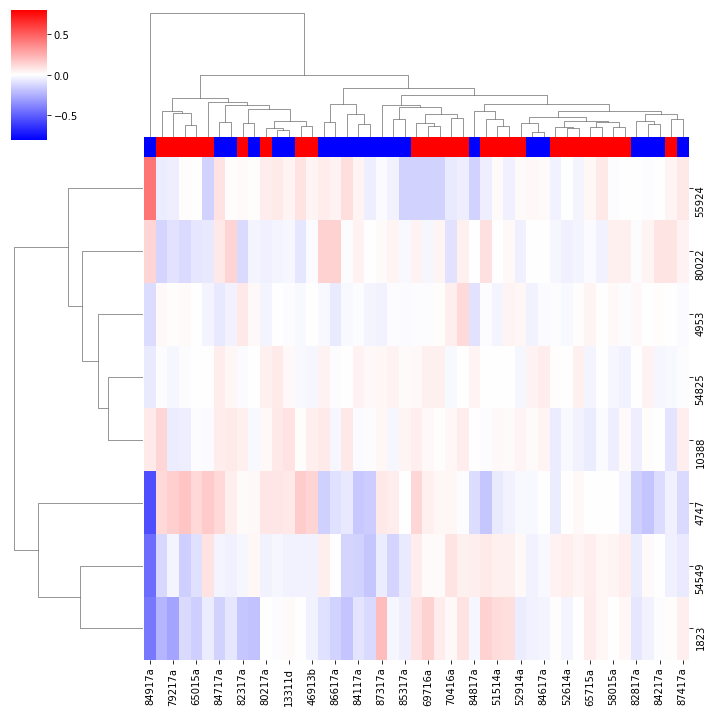

In [51]:
## With healthy
CD8_healthy = pd.read_csv(resultPath+"HealthyPatients/CD4.Ranksum.RFECV.gene.result", index_col=0)
CD8_healthy_ext = CD8_healthy.loc[intersected_genes[0]]
CD8_healthy_ext = CD8_healthy_ext.applymap(lambda x: np.log2(x+1))
CD8_healthy_ext = CD8_healthy_ext.subtract(CD8_healthy_ext.median(axis=1), axis=0)

meta_data = pd.read_csv('../data/annotation_metadata/EPIC_HCvB_metadata_baseline_updated-share.csv')
healthy_samples, shortDD_samples = _LoadDiseaseDuration(CD8_healthy_ext, meta_data, 'healthy')

lut = dict(zip(['short', 'healthy'], "rb"))

cate_map = ['short']*len(shortDD_samples)+['healthy']*len(healthy_samples)
cate_map = [lut[x] for x in cate_map]

sns.clustermap(CD8_healthy_ext[shortDD_samples+healthy_samples], col_colors=cate_map, method='complete', metric='euclidean', cmap='bwr', vmin=-.8, vmax=.8)

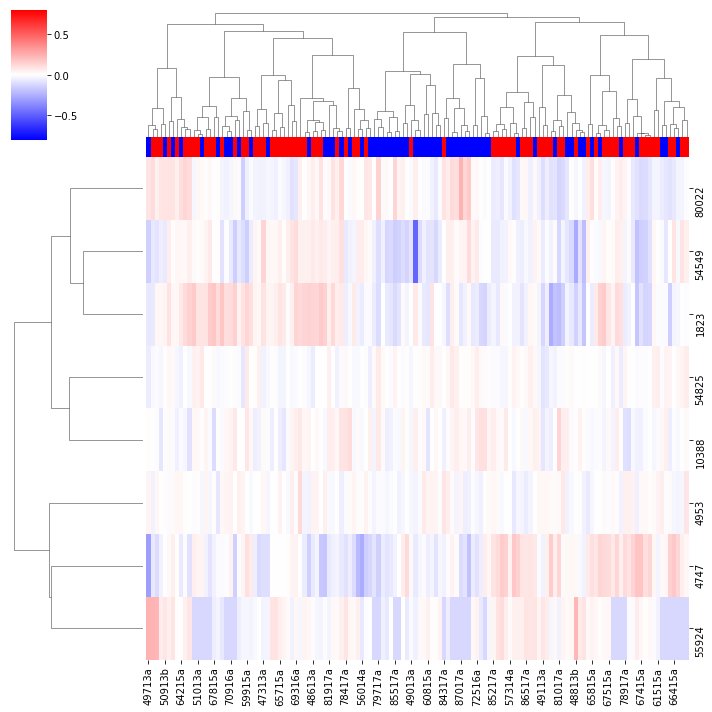

In [52]:
## With healthy
CD8_healthy = pd.read_csv(resultPath+"LongDiseaseDuration/CD4.Ranksum.RFECV.gene.result", index_col=0)
CD8_healthy_ext = CD8_healthy.loc[intersected_genes[0]]
CD8_healthy_ext = CD8_healthy_ext.applymap(lambda x: np.log2(x+1))
CD8_healthy_ext = CD8_healthy_ext.subtract(CD8_healthy_ext.median(axis=1), axis=0)

meta_data = pd.read_csv('../data/annotation_metadata/EPIC_HCvB_metadata_baseline_updated-share.csv')
longDD_samples, shortDD_samples = _LoadDiseaseDuration(CD8_healthy_ext, meta_data, 'long')

lut = dict(zip(['short', 'long'], "rb"))

cate_map = ['short']*len(shortDD_samples)+['long']*len(longDD_samples)
cate_map = [lut[x] for x in cate_map]

sns.clustermap(CD8_healthy_ext[shortDD_samples+longDD_samples], col_colors=cate_map, method='complete', metric='cosine', cmap='bwr', vmin=-.8, vmax=.8)

In [53]:
flatten_genes

[54825,
 4747,
 10388,
 54549,
 80022,
 55924,
 4953,
 1823,
 678,
 9435,
 27152,
 9265,
 9429,
 3897,
 7803,
 3778,
 3141,
 11326]